# Laboratorio Numero 3

## Compresión de imágenes: La transformada discreta del coseno (DCT)


#### La DCT es la base para muchos esquemas de compresión de imágenes y audio, incluyendo los formatos jpg y mp3. En el caso de señales unidimensionales, la DCT está definida por la siguiente expresión:


$$
y(k) = DCT\{x(n)\} = w(k) \cdot \sum_{n=0}^{N-1} x(n) \cdot \cos \left[ \frac{\pi}{2N} \cdot (2n + 1) \cdot k \right]
$$
$$
\text{Para } 0 \leq k < N
$$
$$
\text{Donde: } w(k) = \begin{cases} 
\sqrt{\frac{1}{N}} & \text{Para } k = 0, \\
\sqrt{\frac{2}{N}} & \text{Para } 1 \leq k < N 
\end{cases}
$$
'''

## Metodología para el proceso de comprensión de imágenes usando la Transformada Discreta del Coseno (DCT) 

### 1. División de la Imagen en Bloques
#### Las imágenes se dividen en bloques más pequeños, típicamente de 8x8 píxeles

In [1]:
from PIL import Image
import numpy as np

def add_padding(image_array, block_size):
    height, width = image_array.shape
    padded_height = (height + block_size - 1) // block_size * block_size
    padded_width = (width + block_size - 1) // block_size * block_size
    padded_image = np.zeros((padded_height, padded_width), dtype=image_array.dtype)
    padded_image[:height, :width] = image_array
    return padded_image

def divide_image_into_blocks(image_path, block_size):
    # Cargar la imagen
    image = Image.open(image_path)
    image = image.convert('L')  # Convertir la imagen a escala de grises
    image_array = np.array(image)

    # Agregar padding si es necesario
    image_array = add_padding(image_array, block_size)

    # Obtener las dimensiones de la imagen con padding
    height, width = image_array.shape

    # Dividir la imagen en bloques de 8x8
    blocks = []
    for i in range(0, height, block_size):
        for j in range(0, width, block_size):
            block = image_array[i:i+block_size, j:j+block_size]
            blocks.append(block)

    return blocks

#uso
image_path = 'IMG_0065.jpg'
block_size = 8
blocks = divide_image_into_blocks(image_path, block_size)

# Mostrar algunos bloques
for index, block in enumerate(blocks[:4]):  # Mostrar los primeros 4 bloques
    print(f"Bloque {index + 1}:\n{block}\n")

Bloque 1:
[[210 211 213 223 215 218 188 178]
 [214 211 212 226 207 216 185 168]
 [229 213 211 209 204 211 193 175]
 [208 225 214 222 197 221 193 187]
 [210 214 207 222 205 204 194 202]
 [206 209 203 214 203 201 202 185]
 [203 210 200 212 202 195 204 182]
 [205 217 194 206 206 199 206 184]]

Bloque 2:
[[171 170 173 177 177 174 186 171]
 [184 174 163 175 184 191 179 176]
 [176 175 171 171 183 186 181 181]
 [168 173 166 172 176 179 183 175]
 [177 171 165 167 178 168 177 170]
 [184 186 174 173 168 171 165 173]
 [184 188 185 177 172 171 169 169]
 [175 180 187 191 177 164 174 168]]

Bloque 3:
[[170 181 200 207 191 182 194 192]
 [170 172 195 199 192 184 194 196]
 [171 167 185 193 188 186 192 199]
 [178 168 167 184 184 195 190 190]
 [173 171 165 179 180 191 192 190]
 [160 170 176 179 177 177 193 200]
 [164 168 176 177 181 178 190 198]
 [172 168 174 178 182 182 183 194]]

Bloque 4:
[[187 184 182 203 194 188 189 183]
 [189 182 185 208 215 199 198 191]
 [185 179 175 198 208 202 200 201]
 [178 175

#### Cada dato en el bloque representa el valor de intensidad de un píxel en la imagen en escala de grises. Los valores de intensidad van desde 0 a 255, donde:

####	•	0 representa el negro absoluto.
####	•	255 representa el blanco absoluto.
####	•	Los valores intermedios representan varios tonos de gris, con valores más bajos siendo más oscuros y valores más altos siendo más claros.


### 2. Aplicación de la DCT a Cada Bloque
#### Para cada bloque de 8x8 píxeles, se aplica la Transformada Discreta del Coseno. La DCT convierte la información de píxeles de cada bloque desde el dominio espacial (donde la información está en términos de intensidad de píxeles) al dominio de frecuencia (donde la información está en términos de frecuencias).

 $$ F(u, v) = \frac{1}{4} C(u) C(v) \sum_{x=0}^{7} \sum_{y=0}^{7} f(x, y) \cos \left[ \frac{(2x+1)u\pi}{16} \right] \cos \left[ \frac{(2y+1)v\pi}{16} \right] $$ 

#### donde:

####	•	( f(x, y) ) es el valor del píxel en la posición (x, y) del bloque.
####	•	( F(u, v) ) es el coeficiente DCT en la posición (u, v).
####	•	( C(u) ) y  C(v)  son factores de normalización, definidos como:

$$ C(u) = \begin{cases}
\frac{1}{\sqrt{2}} & \text{si } u = 0 \\
1 & \text{si } u > 0
\end{cases} $$



In [2]:
def C(val):
    return 1/np.sqrt(2) if val == 0 else 1

def apply_dct_to_block(block):
    block_size = block.shape[0]
    dct_block = np.zeros((block_size, block_size))
    for u in range(block_size):
        for v in range(block_size):
            sum_val = 0
            for x in range(block_size):
                for y in range(block_size):
                    sum_val += block[x, y] * np.cos((2*x + 1) * u * np.pi / 16) * np.cos((2*y + 1) * v * np.pi / 16)
            dct_block[u, v] = 0.25 * C(u) * C(v) * sum_val
    return dct_block

def apply_dct_to_blocks(blocks):
    dct_blocks = []
    for block in blocks:
        dct_block = apply_dct_to_block(block)
        dct_blocks.append(dct_block)
    return dct_blocks


# Aplicar la DCT a cada bloque
dct_blocks = apply_dct_to_blocks(blocks)

# Mostrar los primeros 4 bloques transformados
for index, block in enumerate(dct_blocks[:4]):  # Mostrar los primeros 4 bloques transformados
    print(f"DCT del Bloque {index + 1}:\n{block}\n")

DCT del Bloque 1:
[[ 1.63912500e+03  6.23458355e+01 -4.00503027e+01  2.05008928e+01
  -9.37500000e+00  1.04435228e+01 -8.17034303e+00 -2.46034656e+01]
 [ 1.37893851e+01  1.99470802e+01 -1.99237709e+01  9.75288441e+00
  -3.73441164e-01  2.79751151e-01  2.38735209e+01 -8.23088450e+00]
 [-9.91329903e+00 -4.85432218e-01 -9.78813582e+00  9.81537376e+00
  -6.76495125e-02  4.78456440e-01 -8.14016504e+00  8.22657036e+00]
 [-3.49829357e-02 -9.83640674e+00 -7.96781851e+00 -9.84483297e+00
   8.07036177e+00  1.34953818e-01 -2.51965674e-01  5.04362666e-01]
 [ 1.03750000e+01 -7.93138336e+00  4.89961112e-01 -7.29382710e+00
  -1.25000000e-01 -1.04253356e+01  2.02948538e-01 -8.08660139e+00]
 [ 5.37066867e-01 -3.04615197e-01  5.03779152e-01 -4.02735581e-01
  -7.90308167e+00  1.79726574e-01  3.58301277e-01 -2.40212664e-01]
 [-8.80468682e-02  2.61198220e-01  7.60983496e+00  7.81854098e+00
   1.63320371e-01 -1.44265822e-01  2.88135816e-01  8.25674226e+00]
 [-2.63204091e-02 -2.68573895e-01  7.94757735e+00  

### 3. Cuantización de los Coeficientes DCT

#### se cuantizan para reducir la cantidad de datos. La cuantización reduce la precisión de los coeficientes menos importantes (los de alta frecuencia), que generalmente tienen menos impacto visual, y mantiene más precisión en los coeficientes de baja frecuencia, que contienen la mayor parte de la información visual.

In [3]:
def quantize_block(dct_block, quant_matrix):
    return np.round(dct_block / quant_matrix).astype(int)

def quantize_blocks(dct_blocks, quant_matrix):
    quantized_blocks = []
    for dct_block in dct_blocks:
        quantized_block = quantize_block(dct_block, quant_matrix)
        quantized_blocks.append(quantized_block)
    return quantized_blocks

# Matriz de cuantización estándar para JPEG
quantization_matrix = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]
])

# Cuantizar los bloques DCT
quantized_blocks = quantize_blocks(dct_blocks, quantization_matrix)

# Mostrar los primeros 4 bloques cuantizados
for index, block in enumerate(quantized_blocks[:4]):  # Mostrar los primeros 4 bloques cuantizados
    print(f"Bloque Cuantizado {index + 1}:\n{block}\n")

Bloque Cuantizado 1:
[[102   6  -4   1   0   0   0   0]
 [  1   2  -1   1   0   0   0   0]
 [ -1   0  -1   0   0   0   0   0]
 [  0  -1   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]

Bloque Cuantizado 2:
[[88  0  0  1  0  0  0  0]
 [ 0 -2  0  1  0  0  0  0]
 [ 1  1 -1  0  0  0  0  0]
 [-1  1  0  0  0  0  0  0]
 [-1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]

Bloque Cuantizado 3:
[[91 -6 -1 -1  0  0  0  0]
 [ 3  1 -1 -1  0  0  0  0]
 [ 1  1 -1 -1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]

Bloque Cuantizado 4:
[[96 -2  0  2  1  0  0  0]
 [-1 -2 -3 -1  0  0  0  0]
 [ 0  2  1  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [-1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  

### 4. Codificación
#### Los coeficientes cuantizados se reorganizan en un vector y se codifican usando métodos de compresión sin pérdida como la codificación Huffman o la codificación Run-Length.

In [4]:
def zigzag_order(block):
    rows, cols = block.shape
    solution = [[] for i in range(rows + cols - 1)]
    for i in range(rows):
        for j in range(cols):
            sum = i + j
            if (sum % 2 == 0):
                solution[sum].insert(0, block[i][j])
            else:
                solution[sum].append(block[i][j])
    return [item for sublist in solution for item in sublist]

def run_length_encode(arr):
    rle = []
    last_val = arr[0]
    count = 1
    for val in arr[1:]:
        if val == last_val:
            count += 1
        else:
            rle.append((last_val, count))
            last_val = val
            count = 1
    rle.append((last_val, count))
    return rle

# Codificar en zig-zag y luego usar RLE
encoded_blocks = []
for block in quantized_blocks:
    zigzag = zigzag_order(block)
    rle = run_length_encode(zigzag)
    encoded_blocks.append(rle)

# Mostrar los primeros 4 bloques codificados
for index, block in enumerate(encoded_blocks[:4]):  # Mostrar los primeros 4 bloques codificados
    print(f"Bloque Codificado {index + 1}:\n{block}\n")

Bloque Codificado 1:
[(102, 1), (6, 1), (1, 1), (-1, 1), (2, 1), (-4, 1), (1, 1), (-1, 1), (0, 2), (1, 1), (-1, 2), (1, 1), (0, 50)]

Bloque Codificado 2:
[(88, 1), (0, 2), (1, 1), (-2, 1), (0, 1), (1, 1), (0, 1), (1, 1), (-1, 2), (1, 1), (-1, 1), (1, 1), (0, 50)]

Bloque Codificado 3:
[(91, 1), (-6, 1), (3, 1), (1, 2), (-1, 3), (1, 1), (0, 3), (-1, 2), (0, 3), (-1, 1), (0, 46)]

Bloque Codificado 4:
[(96, 1), (-2, 1), (-1, 1), (0, 1), (-2, 1), (0, 1), (2, 1), (-3, 1), (2, 1), (0, 1), (-1, 1), (1, 2), (-1, 1), (1, 1), (0, 49)]



#### Guardar los bloques coficados 

In [5]:
# Guardar los bloques codificados y la forma de la imagen original
image_shape = (add_padding(np.array(Image.open(image_path).convert('L')), block_size)).shape

### Descompresión

#### los coeficientes cuantizados se deshacen del efecto de la cuantización (descuantización), y luego se aplica la Transformada Discreta Inversa del Coseno (IDCT) para convertir los datos de vuelta al dominio espacial.

#### Para aplicar la Transformada Discreta del Coseno Inversa (IDCT) de manera manual, se utiliza la fórmula matemática de la IDCT dada por:

#### $$ f(x, y) = \frac{1}{4} \sum_{u=0}^{N-1} \sum_{v=0}^{N-1} C(u) C(v) F(u, v) \cos \left[ \frac{(2x+1)u\pi}{2N} \right] \cos \left[ \frac{(2y+1)v\pi}{2N} \right] $$

#### donde:

#### $$ C(u) = \frac{1}{\sqrt{2}} \quad \text{si} \quad u = 0 \quad \text{y} \quad C(u) = 1 \quad \text{si} \quad u \neq 0$$

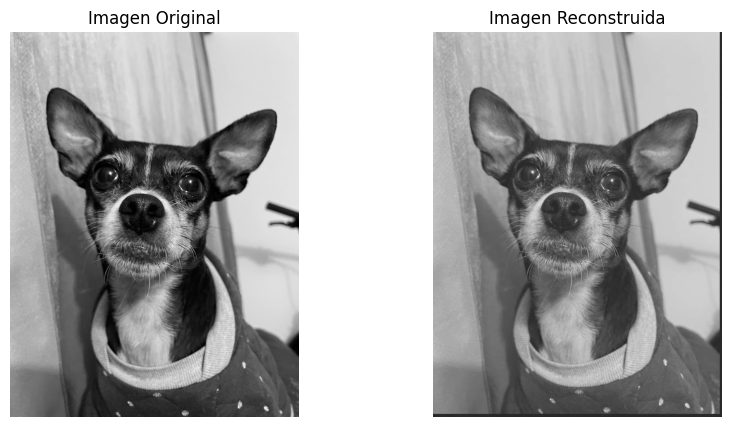

In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Decodificación Run-Length
def run_length_decode(rle):
    arr = []
    for value, count in rle:
        arr.extend([value] * count)
    return arr

# Reorganización en Zig-Zag inverso
def inverse_zigzag_order(arr, rows, cols):
    solution = np.zeros((rows, cols))
    index = 0
    for i in range(rows + cols - 1):
        if i % 2 == 0:
            x = min(i, rows - 1)
            y = i - x
            while x >= 0 and y < cols:
                solution[x, y] = arr[index]
                index += 1
                x -= 1
                y += 1
        else:
            y = min(i, cols - 1)
            x = i - y
            while y >= 0 and x < rows:
                solution[x, y] = arr[index]
                index += 1
                x += 1
                y -= 1
    return solution

# Descuantización
def dequantize_block(quantized_block, quant_matrix):
    return quantized_block * quant_matrix

# Aplicación de la IDCT manual
def apply_manual_idct_to_block(block):
    N = block.shape[0]
    idct_block = np.zeros((N, N))
    for x in range(N):
        for y in range(N):
            sum_val = 0
            for u in range(N):
                for v in range(N):
                    Cu = 1/np.sqrt(2) if u == 0 else 1
                    Cv = 1/np.sqrt(2) if v == 0 else 1
                    sum_val += Cu * Cv * block[u, v] * \
                               np.cos((2*x + 1) * u * np.pi / (2 * N)) * \
                               np.cos((2*y + 1) * v * np.pi / (2 * N))
            idct_block[x, y] = 0.25 * sum_val
    return idct_block

# Reconstrucción de la imagen
def reconstruct_image_from_blocks(blocks, image_shape, block_size):
    reconstructed_image = np.zeros(image_shape)
    height, width = image_shape
    index = 0
    for i in range(0, height, block_size):
        for j in range(0, width, block_size):
            reconstructed_image[i:i+block_size, j:j+block_size] = blocks[index]
            index += 1
    return reconstructed_image

# Código de compresión original
def add_padding(image_array, block_size):
    height, width = image_array.shape
    padded_height = (height + block_size - 1) // block_size * block_size
    padded_width = (width + block_size - 1) // block_size * block_size
    padded_image = np.zeros((padded_height, padded_width), dtype=image_array.dtype)
    padded_image[:height, :width] = image_array
    return padded_image

def divide_image_into_blocks(image_path, block_size):
    # Cargar la imagen
    image = Image.open(image_path)
    image = image.convert('L')  # Convertir la imagen a escala de grises
    image_array = np.array(image)

    # Agregar padding si es necesario
    image_array = add_padding(image_array, block_size)

    # Obtener las dimensiones de la imagen con padding
    height, width = image_array.shape

    # Dividir la imagen en bloques de 8x8
    blocks = []
    for i in range(0, height, block_size):
        for j in range(0, width, block_size):
            block = image_array[i:i+block_size, j:j+block_size]
            blocks.append(block)

    return blocks

def C(val):
    return 1/np.sqrt(2) if val == 0 else 1

def apply_dct_to_block(block):
    block_size = block.shape[0]
    dct_block = np.zeros((block_size, block_size))
    for u in range(block_size):
        for v in range(block_size):
            sum_val = 0
            for x in range(block_size):
                for y in range(block_size):
                    sum_val += block[x, y] * np.cos((2*x + 1) * u * np.pi / 16) * np.cos((2*y + 1) * v * np.pi / 16)
            dct_block[u, v] = 0.25 * C(u) * C(v) * sum_val
    return dct_block

def apply_dct_to_blocks(blocks):
    dct_blocks = []
    for block in blocks:
        dct_block = apply_dct_to_block(block)
        dct_blocks.append(dct_block)
    return dct_blocks

def quantize_block(dct_block, quant_matrix):
    return np.round(dct_block / quant_matrix).astype(int)

def quantize_blocks(dct_blocks, quant_matrix):
    quantized_blocks = []
    for dct_block in dct_blocks:
        quantized_block = quantize_block(dct_block, quant_matrix)
        quantized_blocks.append(quantized_block)
    return quantized_blocks

def zigzag_order(block):
    rows, cols = block.shape
    solution = [[] for i in range(rows + cols - 1)]
    for i in range(rows):
        for j in range(cols):
            sum = i + j
            if (sum % 2 == 0):
                solution[sum].insert(0, block[i, j])
            else:
                solution[sum].append(block[i, j])
    return [item for sublist in solution for item in sublist]

def run_length_encode(arr):
    rle = []
    last_val = arr[0]
    count = 1
    for val in arr[1:]:
        if val == last_val:
            count += 1
        else:
            rle.append((last_val, count))
            last_val = val
            count = 1
    rle.append((last_val, count))
    return rle

# Uso


# Decodificación y reconstrucción
decoded_blocks = []
for rle in encoded_blocks:
    decoded_block = run_length_decode(rle)
    inverse_zigzag = inverse_zigzag_order(decoded_block, block_size, block_size)
    dequantized_block = dequantize_block(inverse_zigzag, quantization_matrix)
    idct_block = apply_manual_idct_to_block(dequantized_block)
    decoded_blocks.append(idct_block)

# Reconstruir la imagen
reconstructed_image = reconstruct_image_from_blocks(decoded_blocks, image_shape, block_size)

# Mostrar la imagen original y lareconstruida
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(Image.open(image_path).convert("L"), cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Imagen Reconstruida")
plt.imshow(reconstructed_image, cmap="gray")
plt.axis("off")

plt.show()

## Implementación con la función DCT de Scipy 

In [7]:
import numpy as np
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt
import cv2

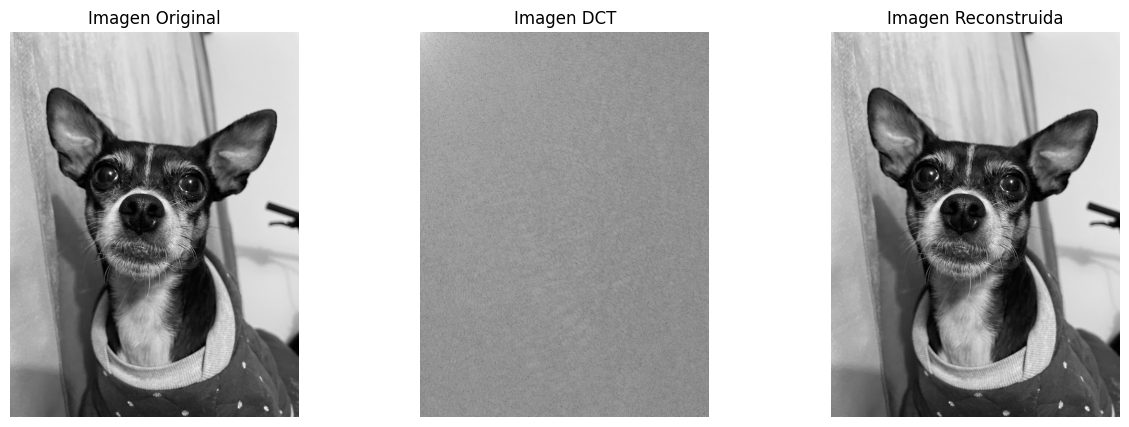

In [8]:


# Función para aplicar la DCT en 2D
def dct2(block):
    return dct(dct(block.T, norm='ortho').T, norm='ortho')

# Función para aplicar la IDCT en 2D
def idct2(block):
    return idct(idct(block.T, norm='ortho').T, norm='ortho')

# Cargar la imagen en escala de grises
img = cv2.imread('IMG_0065.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar la DCT en 2D
dct_img = dct2(img)

# Aplicar la IDCT para reconstruir la imagen
reconstructed_img = idct2(dct_img)

# Visualizar la imagen original, la transformada y la reconstruida
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Imagen Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Imagen DCT")
plt.imshow(np.log(abs(dct_img)), cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Imagen Reconstruida")
plt.imshow(reconstructed_img, cmap='gray')
plt.axis('off')

plt.show()


### dct2(block)
#### Esta función aplica la Transformada Discreta del Coseno (DCT) en dos dimensiones a un bloque (una matriz 2D). El proceso se realiza en dos pasos:

#### - Aplicación a las filas: Primero, la DCT se aplica a cada fila de la matriz.
#### - Aplicación a las columnas: Luego, la DCT se aplica a cada columna del resultado obtenido en el paso anterior.

### idct2(block)
#### Esta función aplica la Transformada Inversa Discreta del Coseno (IDCT) en dos dimensiones de manera similar a dct2:

#### - Aplicación a las filas: Primero, la IDCT se aplica a cada fila de la matriz transformada.
#### - Aplicación a las columnas: Luego, la IDCT se aplica a cada columna del resultado obtenido en el paso anterior.

#### La DCT en scipy maneja automáticamente la normalización y los factores de escala para asegurar que el resultado sea correcto y comparable con la definición teórica de la DCT.

#### El parámetro $$(\texttt{norm='ortho'})$$ asegura que la DCT esté normalizada, lo que significa que incluye los factores de escala $$\sqrt{\frac{1}{N}}$$ y $$\sqrt{\frac{2}{N}}$$ que aparecen en la definición de la DCT en la imagen.

